#  Kaggle Competition - DM I
### Lourenço Ferreira 

### Importar principais bibliotecas utilizadas:

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

###  Importar o Dataset de treino

In [2]:
df = pd.read_csv(r'C:\Users\loure\Google Drive\Faculdade\Mestrado - MADSAD\Data Mining I\Kaggle Competition\training.csv',)

# Tratar os missing values de ? para NA:

df = df.replace({ "?": np.nan} )

#### Printar primeiras linhas do Dataframe:

In [3]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x52,x53,x54,x55,y
0,1,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,56,-3,14,6,no
1,2,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,64,-2,16,6,no
2,3,4,4,4,0,0,0,0,0,0,...,0,0,0,0,0,56,-3,15,6,no
3,4,4,4,4,0,0,0,0,0,0,...,0,0,0,0,0,58,-3,13,6,no
4,5,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,57,-2,15,6,no


###  Principais Características do Dataset

####  N º de linhas e Nº de colunas

In [4]:
df.shape 

(2346, 54)

 #### Analisar tipos de dados das colunas (with .info()) :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2346 non-null   int64 
 1   x1      2346 non-null   int64 
 2   x2      2064 non-null   object
 3   x3      1907 non-null   object
 4   x4      2330 non-null   object
 5   x5      2056 non-null   object
 6   x6      1902 non-null   object
 7   x7      2330 non-null   object
 8   x8      2056 non-null   object
 9   x9      1902 non-null   object
 10  x10     2344 non-null   object
 11  x11     2063 non-null   object
 12  x12     1906 non-null   object
 13  x13     2273 non-null   object
 14  x14     2005 non-null   object
 15  x15     1865 non-null   object
 16  x16     2344 non-null   object
 17  x17     2064 non-null   object
 18  x18     1907 non-null   object
 19  x19     1312 non-null   object
 20  x20     1202 non-null   object
 21  x21     1136 non-null   object
 22  x22     1772 non-null   

#### Algumas colunas foram incorretamente identificadas como objetos, pelo que podemos convert para float:

In [6]:
# Data type conversions

for col in df.select_dtypes(np.object):
    try:
        df[col] = df[col].astype('float32')
    except:
        print()
    # dá erro na ultima iteração por ser a coluna da classe.

#### Estatisticas descritivas sobre as Colunas numéricas

In [7]:
df.describe() # This function shows you some basic descriptive statistics for all numeric columns

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x52,x53,x54,x55
count,2346.000000,2346.000000,2064.000000,1907.000000,2330.000000,2056.000000,1902.000000,2330.000000,2056.000000,1902.000000,...,2346.000000,2064.000000,1907.000000,2346.000000,2064.000000,1907.000000,2346.000000,2284.000000,2346.000000,2346.000000
mean,1173.500000,4.170503,4.200097,4.205034,0.007296,0.010214,0.005258,0.012446,0.011673,0.009464,...,0.008099,0.009205,0.007341,0.008951,0.011628,0.010488,62.527280,-4.621716,14.557545,14.687980
std,677.376188,1.001449,0.959772,0.973097,0.158996,0.261744,0.144959,0.229467,0.218067,0.219791,...,0.114691,0.129925,0.116564,0.236185,0.208546,0.209667,17.860783,1.115557,1.359282,4.511894
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,-7.000000,4.000000,6.000000
25%,587.250000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,-5.000000,14.000000,11.000000
50%,1173.500000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,-4.000000,15.000000,15.000000
75%,1759.750000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,-4.000000,15.000000,19.000000
max,2346.000000,5.000000,5.000000,5.000000,7.000000,10.000000,6.000000,10.000000,9.000000,9.000000,...,3.000000,3.000000,3.000000,10.000000,8.000000,8.000000,99.000000,-2.000000,16.000000,25.000000


In [8]:
#.describe() only analyzes numeric columns by default, but you can provide other data types if you use the include parameter:
df.describe(include=np.object)

,y
count,2346
unique,2
top,no
freq,2189


In [9]:
# Podemos ajustar a precisão de casas decimais! Não precisamos de ter tantas:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### Contagem Absoluta por Classe dos records

In [10]:
df["y"].value_counts()

no     2189
yes     157
Name: y, dtype: int64

#### Contagem Relativa por Classe dos records

In [11]:
df["y"].value_counts() / len(df)*100 

no    93.31
yes    6.69
Name: y, dtype: float64

###  Analisar Missing Values

#### Frequência Absoluta de NA's por coluna


In [12]:
NA_Analysis = df.isna().sum()
NA_Analysis.sort_values(ascending=False).head(10) # Mostrar as 10 colunas com mais NA's

x21    1210
x20    1144
x19    1034
x27    1019
x26     905
x24     860
x25     752
x23     749
x36     646
x33     628
dtype: int64

#### Frequência Relativa de NA's por coluna


In [13]:
NA_Analysis = df.isnull().sum()/len(df)*100
NA_Analysis.sort_values(ascending=False).head(10) # Mostrar as 10 colunas com mais NA's

x21   51.58
x20   48.76
x19   44.08
x27   43.44
x26   38.58
x24   36.66
x25   32.05
x23   31.93
x36   27.54
x33   26.77
dtype: float64

### Analisar Correlação entre Atributos

In [14]:
df.corr()


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x52,x53,x54,x55
id,1.00,-0.35,-0.34,-0.32,-0.05,-0.04,-0.05,-0.06,-0.07,-0.06,...,-0.02,-0.02,-0.01,0.02,0.02,0.01,0.12,-0.91,0.07,0.99
x1,-0.35,1.00,0.84,0.78,0.04,0.03,0.03,0.04,0.04,0.03,...,0.06,0.06,0.05,0.03,0.04,0.03,-0.10,0.34,0.01,-0.33
x2,-0.34,0.84,1.00,0.87,0.03,0.03,0.03,0.04,0.04,0.03,...,0.06,0.06,0.05,0.03,0.05,0.03,-0.11,0.35,0.02,-0.32
x3,-0.32,0.78,0.87,1.00,0.03,0.03,0.03,0.03,0.05,0.04,...,0.05,0.06,0.05,-0.03,0.03,0.04,-0.10,0.33,0.02,-0.31
x4,-0.05,0.04,0.03,0.03,1.00,0.51,0.95,0.95,0.92,0.95,...,0.04,0.04,0.05,0.08,0.13,0.14,-0.05,0.05,0.01,-0.05
x5,-0.04,0.03,0.03,0.03,0.51,1.00,0.53,0.49,0.50,0.52,...,-0.00,-0.00,-0.00,0.01,0.01,0.01,-0.04,0.04,0.01,-0.04
x6,-0.05,0.03,0.03,0.03,0.95,0.53,1.00,0.91,0.93,0.96,...,-0.00,-0.00,-0.00,0.01,0.01,0.02,-0.05,0.06,0.01,-0.05
x7,-0.06,0.04,0.04,0.03,0.95,0.49,0.91,1.00,0.97,0.95,...,0.04,0.04,0.03,0.05,0.09,0.10,-0.05,0.06,0.01,-0.07
x8,-0.07,0.04,0.04,0.05,0.92,0.50,0.93,0.97,1.00,0.97,...,0.05,0.05,0.04,0.02,0.02,0.02,-0.05,0.07,0.01,-0.08
x9,-0.06,0.03,0.03,0.04,0.95,0.52,0.96,0.95,0.97,1.00,...,0.04,0.03,0.04,0.02,0.02,0.02,-0.04,0.06,0.01,-0.06


### Histograma dos atributos do modelo

Histograma para o atributo x1 :


<Figure size 576x576 with 0 Axes>

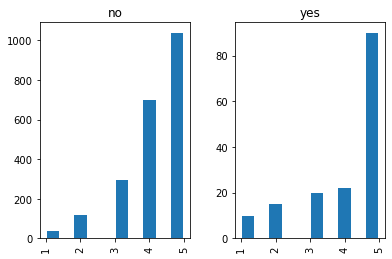

Histograma para o atributo x2 :


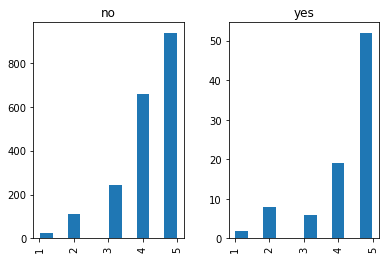

Histograma para o atributo x3 :


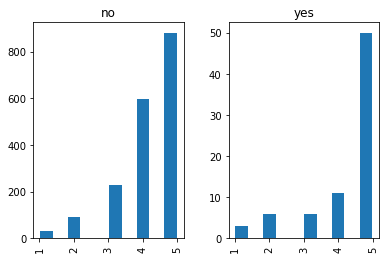

Histograma para o atributo x4 :


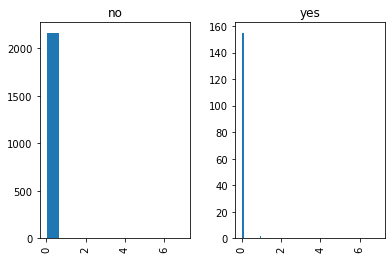

Histograma para o atributo x5 :


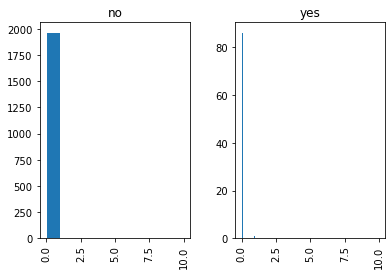

Histograma para o atributo x6 :


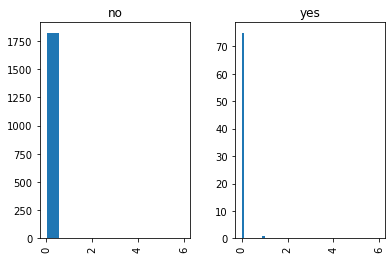

Histograma para o atributo x7 :


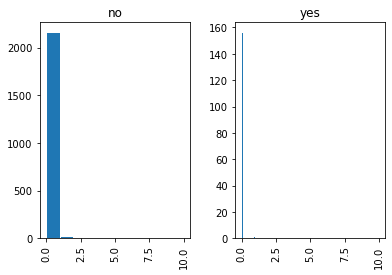

Histograma para o atributo x8 :


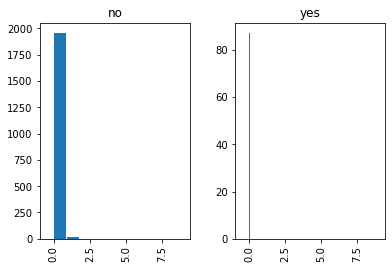

Histograma para o atributo x9 :


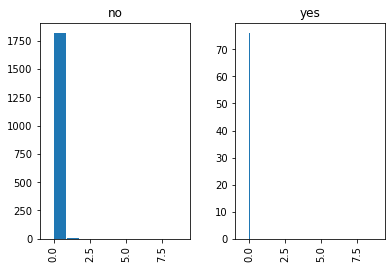

Histograma para o atributo x10 :


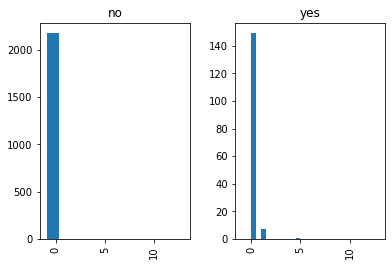

Histograma para o atributo x11 :


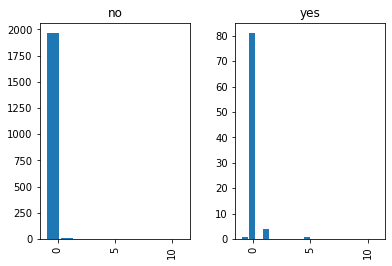

Histograma para o atributo x12 :


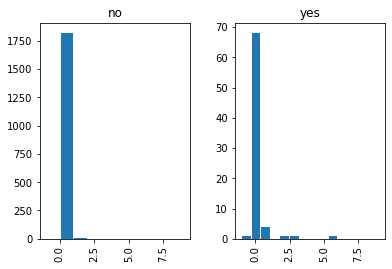

Histograma para o atributo x13 :


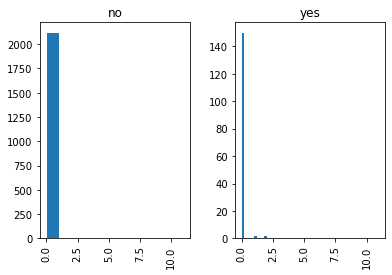

Histograma para o atributo x14 :


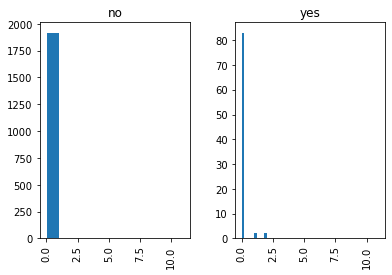

Histograma para o atributo x15 :


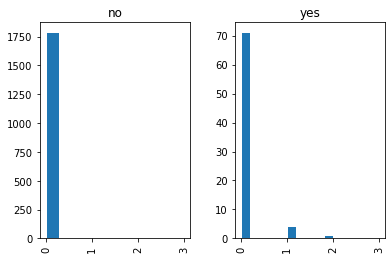

Histograma para o atributo x16 :


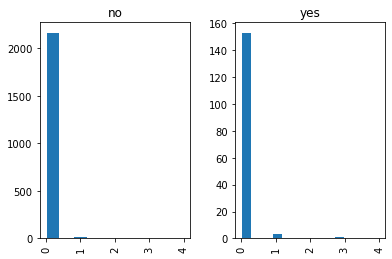

Histograma para o atributo x17 :


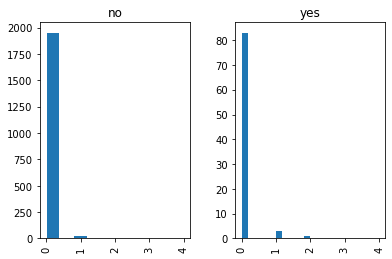

Histograma para o atributo x18 :


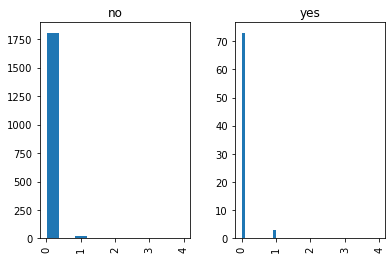

Histograma para o atributo x19 :


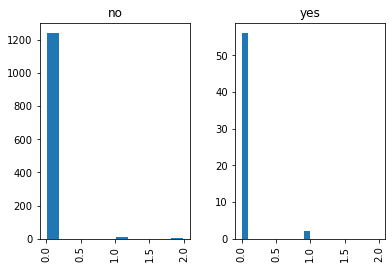

Histograma para o atributo x20 :


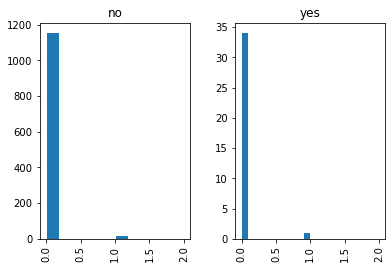

Histograma para o atributo x21 :


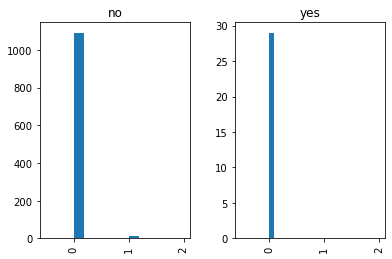

Histograma para o atributo x22 :


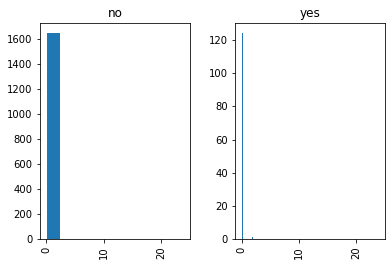

Histograma para o atributo x23 :


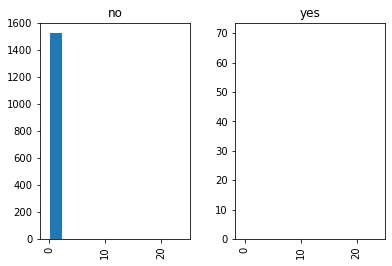

Histograma para o atributo x24 :


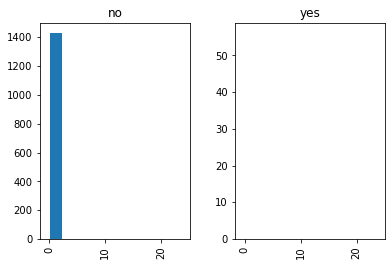

Histograma para o atributo x25 :


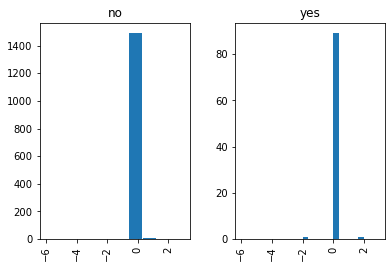

Histograma para o atributo x26 :


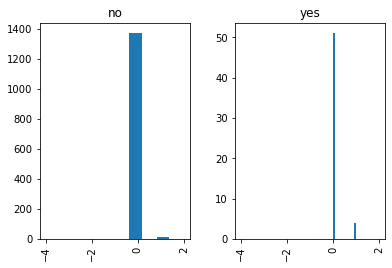

Histograma para o atributo x27 :


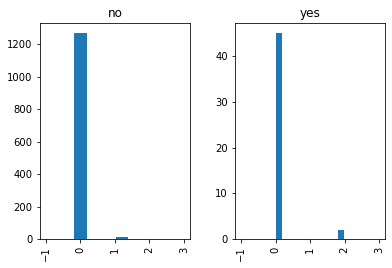

Histograma para o atributo x28 :


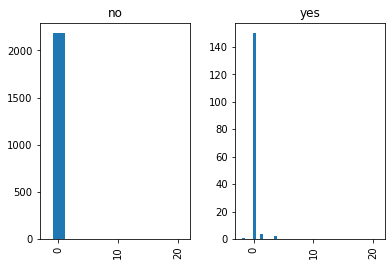

Histograma para o atributo x29 :


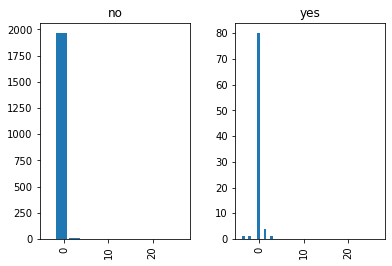

Histograma para o atributo x30 :


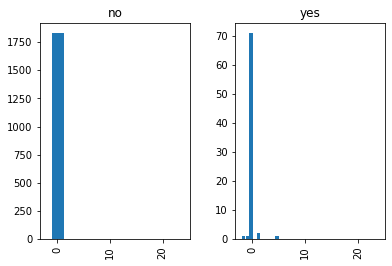

Histograma para o atributo x31 :


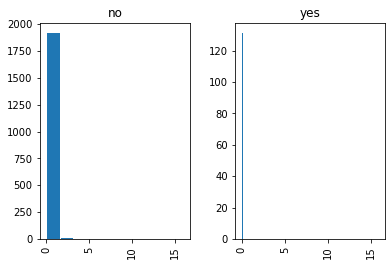

Histograma para o atributo x32 :


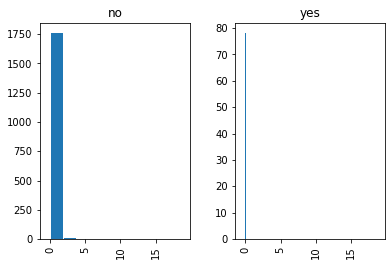

Histograma para o atributo x33 :


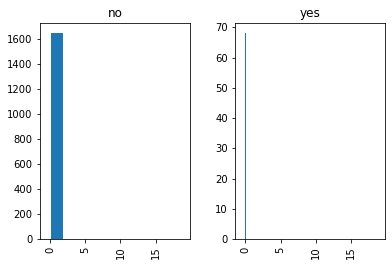

Histograma para o atributo x34 :


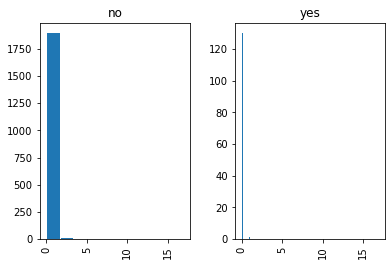

Histograma para o atributo x35 :


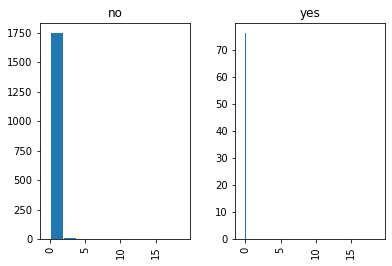

Histograma para o atributo x36 :


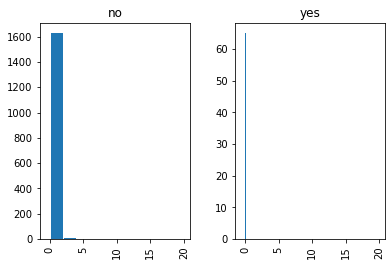

Histograma para o atributo x37 :


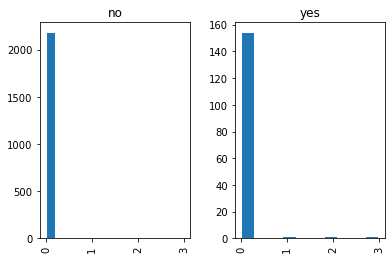

Histograma para o atributo x38 :


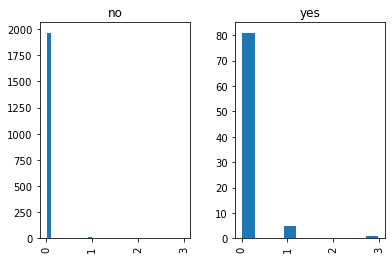

Histograma para o atributo x39 :


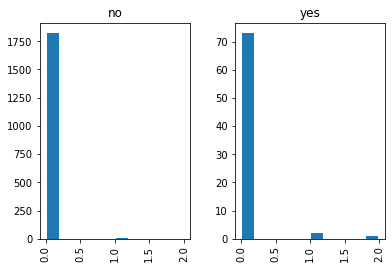

Histograma para o atributo x40 :


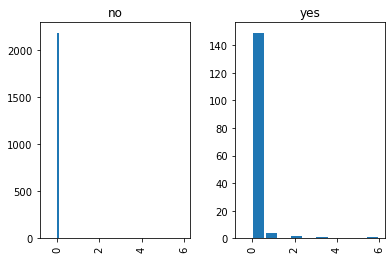

Histograma para o atributo x41 :


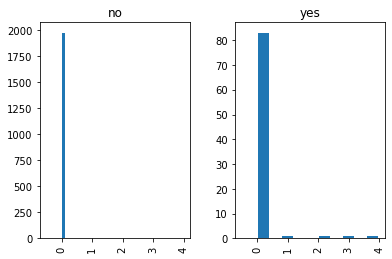

Histograma para o atributo x42 :


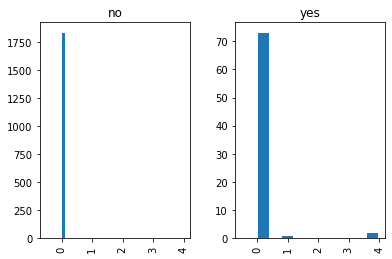

Histograma para o atributo x43 :


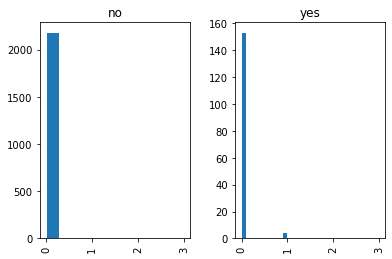

Histograma para o atributo x44 :


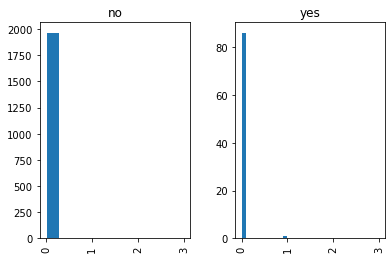

Histograma para o atributo x45 :


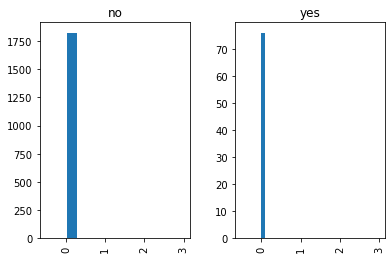

Histograma para o atributo x46 :


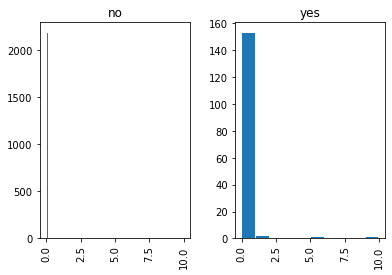

Histograma para o atributo x47 :


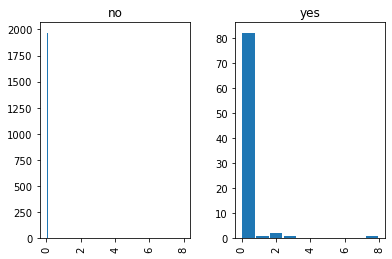

Histograma para o atributo x48 :


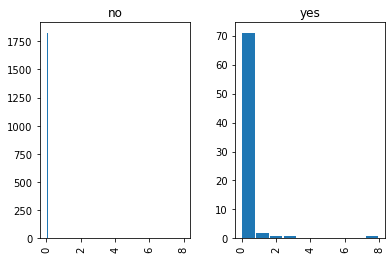

Histograma para o atributo x52 :


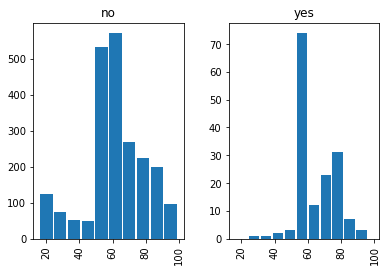

Histograma para o atributo x53 :


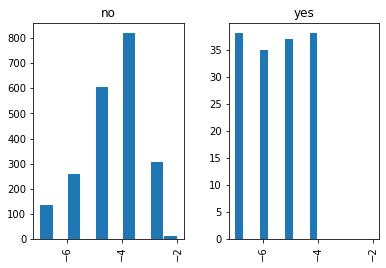

Histograma para o atributo x54 :


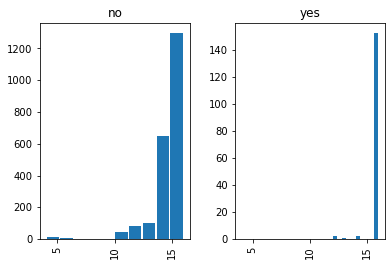

Histograma para o atributo x55 :


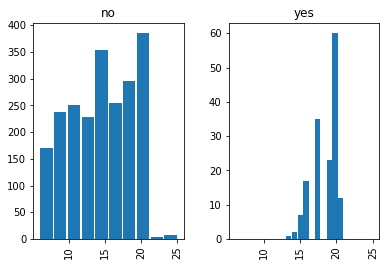

Histograma para o atributo y :


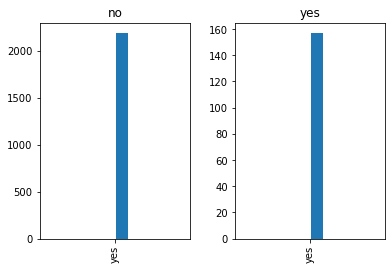

In [15]:
fig = plt.figure(figsize = (8,8))
#ax = fig.gca()
for c in df:
    if c != 'id':
        try:
            print('Histograma para o atributo '+ c + ' :')
            df.hist(column = c, by = 'y',sharex=True, zorder=2, rwidth=0.9)
            plt.show()
        except:
            print()
    


## Separar o Dataset entre atributos e classe

In [16]:
X = df.drop(['id', 'y'], axis=1) # Features - todas menos o ID e a classe
y = df.y # Target variable


## Split Train Dataset

Train Test Split is one of the important steps in Machine Learning. It is very important because your model needs to be evaluated before being deployed. 

The main idea behind the train test split is to convert original data set into 2 parts:
train
test
where train consists of training data and training labels and test consists of testing data and testing labels.

The easiest way to do it is by using scikit-learn, which has a built-in function train_test_split. Let’s code it!

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Applying Several Algorithms without Pre-Processing

 ## 1 - Decision Tree

Nota: Apesar de o objectivo neste momento ser treinar os algoritmos sem pré-processamento dos dados, este algoritmo não é compatível com NA's, pelo que é necessário tratarmos os valores em falta primeiro, pelo que podemos seguir multiplas abordagens:
 
    (Para já vamos apenas substituir por 0 os NA's)

In [20]:
# Vamos primeiro gerar um novo dataframe que vai ser usado e manipulado para o algoritmo Decision Trees
DT_df = df

DT_df.dropna(axis  = 0)               #Apagar as linhas com NA's
DT_df.dropna(axis  = 1)               #Apagar as colunas com NA's
DT_df.fillna(value = 0, inplace = True)               #Substituir os missing values por um valor fixo (0 neste caso)
DT_df.fillna(axis=0, method='ffill')  #Substituir os NA's pelo valor da linha acima.

#Substituir os missing values pela média
    
#for c in DT_df:
#    df[c].fillna(value=df[c].mean(), inplace=True)



,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x52,x53,x54,x55,y
0,1,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,56,-3.00,14,6,no
1,2,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,64,-2.00,16,6,no
2,3,4,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,56,-3.00,15,6,no
3,4,4,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,58,-3.00,13,6,no
4,5,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,57,-2.00,15,6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,2342,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,64,-4.00,14,25,no
2342,2343,2,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,22,-5.00,15,25,no
2343,2344,2,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,78,-5.00,13,25,no
2344,2345,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,53,0.00,14,25,no


#### Vamos então partir o Dataset de treino:

In [22]:
DT_X = DT_df.drop(['id', 'y'], axis=1) # Features - todas menos o ID e a classe
DT_y = df.y # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(DT_X, DT_y, test_size=0.2, random_state=1) # 80% training and 20% test

#### Treinar o algoritmo:

In [97]:

 # Create Decision Tree classifer object
 clf = DecisionTreeClassifier(criterion="entropy")

 # Train Decision Tree Classifer
 clf = clf.fit(X_train,y_train)

#### Gerar previsões para o dataset de test

In [98]:

y_pred = clf.predict(X_test)


#### Avaliar a precisão do algoritmo face aos verdadeiros valores para a classe do dataset de teste:

In [140]:
 print("Precisão do Algoritmo:",metrics.accuracy_score(y_test, y_pred).round(4)*100, "%")

Precisão do Algoritmo: 94.04 %


Sabemos então que o nosso algoritmo acertou em cerca de 94% das classes do dataset de treino!

#### Nota:
O nosso dataset foi partido apenas uma vez e treinado apenas uma vez, pelo que esta valor de precisão vai variar de execução para execução e não nos dá muito segurança relativamente à precisão do algoritmo. Uma forma mais fiável e segura de avaliar a precisão do algoritmo é através de Cross Validation!

#### Cross Validation (K = 10) : 

In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf, DT_X, DT_y, scoring='accuracy', cv=cv, n_jobs=-1)

# Lista com os 10 testes de precisão.
print(scores)

[0.94042553 0.95319149 0.95744681 0.96170213 0.95319149 0.97021277
 0.94017094 0.96153846 0.97008547 0.97863248]


In [148]:
 print("Precisão Média do Algoritmo com 10 Fold Cross Validation:", scores.mean().round(3) * 100, "%")

Precisão Média do Algoritmo: 95.7 %


A estimativa do desempenho do algoritmo avaliado por k-fold Cross Validations pode ter ruído.

Cada vez que o procedimento é executado, vamos ter uma divisão diferente do conjunto de dados em k-folds pode ser implementada e a distribuição das pontuações de desempenho pode ser diferente, resultando numa estimativa média diferente de desempenho do modelo.

Uma solução para reduzir o ruído no desempenho estimado do modelo é aumentar o valor de folds (k). Isso vai reduzir o bias no desempenho estimado do modelo, embora aumente a variância (mais propenso a overfitting).

Uma abordagem alternativa e preferível para evitar o overfitting, é repetir o processo de validação cruzada k-fold várias vezes e calcular o desempenho médio em todas as repetições e folds:

### Repeated 10-Fold Cross-Validation


In [154]:
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# evaluate model
scores = cross_val_score(clf, DT_X, DT_y, scoring='accuracy', cv=cv, n_jobs=-1)
#print(scores)
print("Precisão Média do Algoritmo com 10 repetições do 10 Fold Cross Validation:", scores.mean().round(3) * 100, "%")

Precisão Média do Algoritmo com 10 repetições do 10 Fold Cross Validation: 95.8 %


 Desta forma podemos ter mais segurança relativamente à performance do nosso algoritmo!

Apesar de termos um valor bastante alto para a precisão do nosso algoritmo, visto que estamos perante um problema de classificação não temos realmente garantias que o nosso algoritmo seja um bom classificador principalmente quando uma grande parte do dataset de teste é todo da mesma classe!

Quote: "Remember, accuracy is a very useful metric when all the classes are equally important. But this might not be the case if we are predicting if a patient has cancer."

Uma forma muito mais fiável de analisar a performance do nosso classificador é através de uma Confusion Matrix!



### Confusion Matrix

In [176]:
from sklearn.model_selection import cross_val_predict

#y_pred = cross_val_predict(clf, DT_X, DT_y, cv=3)
y_pred = clf.predict(X_test)

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[424,  15],
       [ 13,  18]], dtype=int64)

Visualização mais complexa da Confusion Matrix:

Confusion matrix, without normalization
[[424  15]
 [ 13  18]]
Normalized confusion matrix
[[0.96583144 0.03416856]
 [0.41935484 0.58064516]]


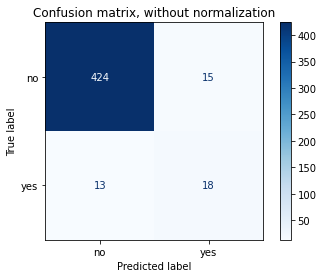

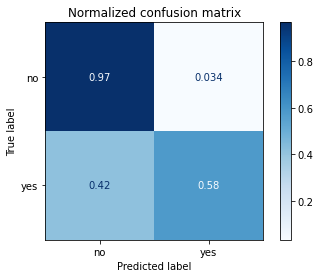

In [191]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["no","yes"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Precision & Recall

Podemos ainda calcular a Precision (De todos os positivos que eu estimei quantos é que são realmente positivos - True Positives):

In [217]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, pos_label='yes').round(4)*100 # Nota é preciso indicar qual é a classe positiva

54.55

E calcular o Recall  ( também chamado de Sensitivity )
(De todos os reais positivos quantos é que eu estimei que são positivos): 

In [222]:
recall_score(y_test, y_pred, pos_label='yes').round(4)*100  # Nota é preciso indicar qual é a classe positiva

58.06

Relembrar se necessário:
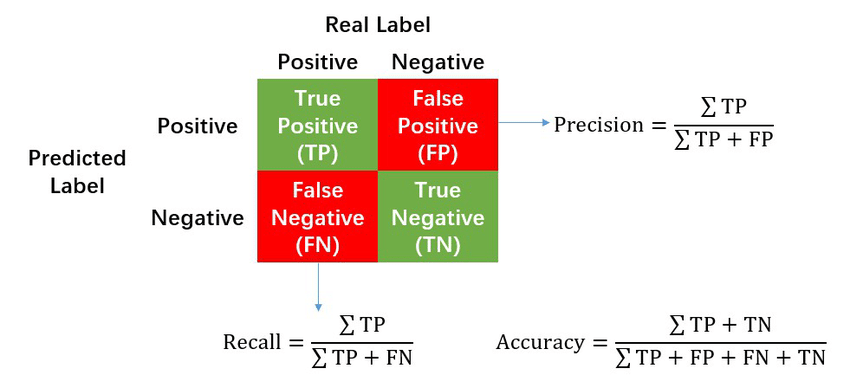

Podemos então utilizar a Precision ou Recall para o nosso problema de Classificação!

Nota: Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus.
Recall: Appropriate when minimizing false negatives is the focus.
Sometimes, we want excellent predictions of the positive class. We want high precision and high recall.

Se queremos maximizar ambas as métricas, podemos utilizar uma nova métrica que combina a Precision e o Recall no seu cálculo - F-score.


### F-Score - Média harmônica entre a Precision e Recall

In [223]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, pos_label = 'yes')
print('F-Score: %.3f' % score)

F-Score: 0.562


Conclusão: Apesar de inicialmente termos uma accuracy de 94% que parecia aparentemente muito bom, o nosso algoritmo apenas consegiu atingir um F-score de 56,2% ! ( F score varia entre 0 e 100% )

### ROC (Receiver Operator Characteristic)  and AUC (area under the curve)

Uma curva ROC mostra o “True Positive Rate vs. False Positive Rate” para diferentes níveis de Threshold.

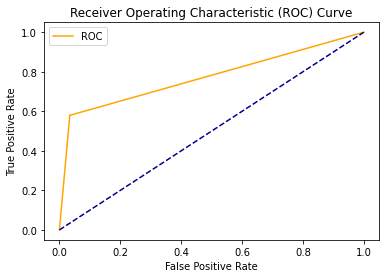

In [213]:
# Python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 'yes')
plot_roc_curve(fpr, tpr)


In [215]:
#Estimar probabilidades para o dataset test com base no algoritmo treinado.
probs = clf.predict_proba(X_test)

#Keep probabilities of the positive class only.
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

AUC Score: 0.77


 AUC (“area under the ROC curve”)  é uma forma de resumir a curva ROC num único valor, calculando a “área debaixo da curva”!
 Quanto mais alto for o AUC melhor é o algoritmo a prever 0s como 0s e 1s e 1s.
 Por exemplo, quanto mais alto for o AUC, melhor será o modelo capaz de classificar entre pacientes com/doença.


## K-Nearest Neighbor (KNN) 

## Naive Bayes